<a href="https://colab.research.google.com/github/ramabhargavivempolu/Comet-Fragmentation/blob/main/Comet_Fragmentation_FFM_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guide to Running Code and Downloading a CSV File in Google Colab

**Access Google Colab:** Open your browser and navigate to Google Colab. Ensure you're logged into your Google account.

**Open Your Notebook:** If you've received a link to a Google Colab notebook, click on that link. If you're starting from the Google Colab homepage, you can click on the File menu and select Open notebook to choose your desired notebook.

**Run the Code:**

* Go to the top menu bar.
* Find the menu labeled Runtime.
* Click on Runtime to reveal a dropdown menu.
* From the dropdown, select Run all. This will execute all the code cells in the notebook from top to bottom.

**Locate the Files Section:**

* On the left-hand side of the screen, you will see several icons.
* Look for the folder-shaped icon and click on it. This is the Files section where all files generated or uploaded during your Colab session are stored.

**Download Your CSV File:**

* In the Files section, browse through the list to locate your CSV file.
* Right-click on the file name.
* From the dropdown menu, select Download. The file will be downloaded to the default downloads folder of your browser/computer.

# **Fundamental Fragment Methodology (FFM)**

The GSMPython is a Python script used to model the fragmentation and fragment separation processes of a comet under different structural assumptions. The comet fragmentation happens in a sequence of generations. In each generation, the comet breakup can be modeled in two ways. The broken fragment can be kept as a fraction of the original fragment (the fractional methodology—FM) or in each generation the fractions can be rounded to fundamental fragments (the fundamental fragment methodology—FFM). This section focuses on and describes the python script developed according to the fundamental fragment methodology (FFM). The results of FFM and FM methodologies are very much the same. The choice between the two methodologies is a user preference.



In [ ]:
# @title Importing Libraries
import numpy as np
import math
from decimal import Decimal, ROUND_HALF_UP
from decimal import Decimal
from itertools import zip_longest
import matplotlib.pyplot as plt
import csv

The code given is used to model the fragmentation and separation processes of a comet when exposed to different conditions. In this scenario, the input parameters are the values of nf, ns, d_comet, and n.

nf represents the number of fundamental fragments in each generation, ns indicates the separation between two fragments, d_comet is the diameter of the comet, and n refers to the total number of generations to model.

The code contains several functions, each responsible for a part of the modeling process. It also includes data visualization using matplotlib to display the fragmentation and separation process over generations.

In [ ]:
# @title Calculating Fragmentation and Separation
def fragment_chain(nf, ns, nmax, n):
    # Calculating the length of the fragment chain for each generation
    fragment_chain_values = []
    for n_gen in range(1, int(n+1)):
        Ln = (nf*ns - (ns - 1) + ns*(nf-1)*(n_gen-1))
        # Convert to float for decimal calculations, then round to nearest integer
        Ln = round(float(Ln), 3)  # increase the decimal places for better precision
        fragment_chain_values.append(int(round(Ln)))  # rounding and converting to int
    return fragment_chain_values

def fragmentation_and_separation(nf, clusters, decomposed_clusters, decomposition_counts):
    fragmentation_results = []
    cluster_start_index = 0
    decomposed_cluster_index = 0

    # Adjust decomposed_clusters to match the sum of decomposition_counts
    if len(decomposed_clusters) < sum(decomposition_counts):
        diff = sum(decomposition_counts) - len(decomposed_clusters)
        # Add zeros before the last number
        decomposed_clusters = decomposed_clusters[:-1] + [0]*diff + decomposed_clusters[-1:]

    for i in range(len(decomposition_counts)):
        for _ in range(decomposition_counts[i]):
            cluster = clusters[cluster_start_index]
            decomposed_cluster = decomposed_clusters[decomposed_cluster_index]
            decomposed_cluster_index += 1

            # Fragmentation
            part = decomposed_cluster // nf
            remainder = decomposed_cluster % nf

            # Round and adjust
            rounded_fragments = [part if j < nf - remainder else part + 1 for j in range(nf)]
            adjustment = decomposed_cluster - sum(rounded_fragments)  # Calculate the difference after rounding
            rounded_fragments[-1] += adjustment  # Add the difference to the last fragment

            # Sort the fragments so the distinct number is at the end
            freq = {x: rounded_fragments.count(x) for x in rounded_fragments}
            rounded_fragments.sort(key=lambda x: (freq[x], -x), reverse=True)

            # Check if the last number is different from the rest
            if freq[rounded_fragments[-1]] == 1:
                # If so, move it to the end
                rounded_fragments.append(rounded_fragments.pop(rounded_fragments.index(rounded_fragments[-1])))

            # If the last two numbers are zero, move them to the front
            if rounded_fragments[-2:] == [0, 0]:
                rounded_fragments = [0, 0] + rounded_fragments[:-2]
            # Insert zeros at the beginning
            rounded_fragments = [0] * cluster_start_index + rounded_fragments
            fragmentation_results.append(rounded_fragments)

        cluster_start_index += 1  # Move to the next cluster after fully processing the current one

    return fragmentation_results

def initial_decomposition(clusters, base):
    decomposed_clusters = []
    decomposition_counts = []

    for cluster in clusters:
        count = 0
        while cluster >= base:
            cluster -= base
            decomposed_clusters.append(base)
            count += 1
        if cluster > 0:
            decomposed_clusters.append(cluster)
            count += 1
        decomposition_counts.append(count)

    middle_index = len(decomposition_counts) // 2

    # If the length is even, make the entire list a mirror of the first half
    if len(decomposition_counts) % 2 == 0:
        return decomposition_counts[:middle_index] + decomposition_counts[:middle_index][::-1], decomposed_clusters
    # If the length is odd, exclude the middle element when mirroring
    else:
        return decomposition_counts[:middle_index] + [decomposition_counts[middle_index]] + decomposition_counts[:middle_index][::-1], decomposed_clusters

def separation(nf, clusters, decomposed_clusters, decomposition_counts, ns):
    fragmentation_results = []
    cluster_start_index = 0
    decomposed_cluster_index = 0

    # Adjust decomposed_clusters to match the sum of decomposition_counts
    if len(decomposed_clusters) < sum(decomposition_counts):
        diff = sum(decomposition_counts) - len(decomposed_clusters)
        # Add zeros before the last number
        decomposed_clusters = decomposed_clusters[:-1] + [0]*diff + decomposed_clusters[-1:]

    for i in range(len(decomposition_counts)):
        for _ in range(decomposition_counts[i]):
            cluster = clusters[cluster_start_index]
            decomposed_cluster = decomposed_clusters[decomposed_cluster_index]
            decomposed_cluster_index += 1

            # Fragmentation
            part = (decomposed_cluster // nf)
            remainder = decomposed_cluster % nf

            # Round and adjust
            rounded_fragments = [part if j < nf - remainder else part + 1 for j in range(nf)]
            adjustment = decomposed_cluster - sum(rounded_fragments)  # Calculate the difference after rounding
            rounded_fragments[-1] += adjustment  # Add the difference to the last fragment

            # Sort the fragments so the distinct number is at the end
            freq = {x: rounded_fragments.count(x) for x in rounded_fragments}
            rounded_fragments.sort(key=lambda x: (freq[x], -x), reverse=True)

            # Check if the last number is different from the rest
            if freq[rounded_fragments[-1]] == 1:
                # If so, move it to the end
                rounded_fragments.append(rounded_fragments.pop(rounded_fragments.index(rounded_fragments[-1])))

            # If the last two numbers are zero, move them to the front
            if rounded_fragments[-2:] == [0, 0]:
                rounded_fragments = [0, 0] + rounded_fragments[:-2]

            # Insert zeros at the beginning and in-between the rounded fragments
            # Create a new list for inserting zeros
            new_rounded_fragments = [0] * cluster_start_index

            # Insert zeros within each fragment
            for fragment in rounded_fragments:
                new_rounded_fragments.append(fragment)
                new_rounded_fragments.extend([0] * (ns - 1))  # Insert ns-1 zeros after each number

            # Remove the extra zeros at the end
            while new_rounded_fragments and new_rounded_fragments[-1] == 0:
                new_rounded_fragments.pop()

            # Adjust the first number to be no more than 1 and distribute the excess value to the next numbers
            if new_rounded_fragments and new_rounded_fragments[0] > 1:
                excess = new_rounded_fragments[0] - 1
                new_rounded_fragments[0] = 1

                # Distribute the excess value
                for i in range(1, len(new_rounded_fragments)):
                    new_rounded_fragments[i] += excess
                    if new_rounded_fragments[i] <= 1:
                        break  # If we've managed to distribute all excess value, stop
                    excess = new_rounded_fragments[i] - 1  # Calculate the new excess value
                    new_rounded_fragments[i] = 1  # Set the current number to 1

            fragmentation_results.append(new_rounded_fragments)

        cluster_start_index += 1  # Move to the next cluster after fully processing the current one

    return fragmentation_results

def fragmentation_and_separation_A(nf, clusters):
    fragmentation_results = []
    for i in range(len(clusters)):
        sub_cluster = [round((clusters[i]/nf),3)]*nf
        for j in range(i):
            sub_cluster.insert(0, 0)
            sub_cluster.append(0)
        fragmentation_results.append(sub_cluster)

    rounded_results = []
    for sub_cluster in fragmentation_results:
        rounded_sub_cluster = [round(x) for x in sub_cluster]
        rounded_results.append(rounded_sub_cluster)

    return rounded_results

def separation_A(nf, clusters, ns, n_1, nmax, n):
    fragmentation_results = []
    for i in range(len(clusters)):
        sub_cluster = []
        for j in range(nf):
            # calculate base case for zeros
            if ns % 2 == 0:
                zeros = ns + (ns - 1) * (2 * 1 - 1)
            else:
                zeros = (ns) + (ns-1)

            # additional ns for n_1 > 1
            if n_1 > 1:
                zeros += ns * (n_1 - 1)

            sub_cluster.extend([clusters[i] / nf] + [0] * zeros)
        sub_cluster = [0] * (ns * i) + sub_cluster
        fragmentation_results.append(sub_cluster)

    rounded_results = []
    for sub_cluster in fragmentation_results:
        rounded_sub_cluster = [round(x) for x in sub_cluster]
        rounded_results.append(rounded_sub_cluster)

    return rounded_results

def layout_and_addition(results, Ne):
    length = max([len(r) for r in results])
    addition_results = [0]*length
    for r in results:
        for i in range(len(r)):
            addition_results[i] += r[i]
    addition_results = [round(num, 3) for num in addition_results]
    while addition_results and addition_results[-1] == 0.0:
        addition_results.pop()
    return addition_results


def generate_pattern(nf, n_lines):
    pattern = [1]*nf
    patterns = [pattern]

    for _ in range(n_lines-1):
        pattern = np.convolve(pattern, [1]*nf).tolist()
        patterns.append(pattern)

    return patterns

def compare_results(nf, clusters, decomposed_clusters, decomposition_counts):
    results_A = fragmentation_and_separation_A(nf, clusters)
    results_B = fragmentation_and_separation(nf, clusters, decomposed_clusters, decomposition_counts)

    # Flatten the results
    flattened_A = [item for sublist in results_A for item in sublist]
    flattened_B = [item for sublist in results_B for item in sublist]

    # Ensure both results are of the same length
    if len(flattened_A) != len(flattened_B):
        return False, [float('inf')] * len(flattened_A)  # They are different by definition

    differences = [abs(a - b) for a, b in zip(flattened_A, flattened_B)]
    return all(diff <= 9 for diff in differences), differences

def adjust_clusters(clusters, desired_sum):
    """Adjust the values in the clusters so that their sum equals desired_sum."""
    current_sum = sum(clusters)
    diff = desired_sum - current_sum

    if diff == 0:
        return clusters  # No adjustment needed

    # Simple logic: Distribute the difference to the largest element in the cluster
    # You can adjust this logic to divide among all values, or in any other way.
    largest_index = clusters.index(max(clusters))
    clusters[largest_index] += diff

    return clusters


In [ ]:
# @title Comet Fragmentation and Separation Simulation
def main():
    nf = int(input("Enter the value of nf (nf>=2): "))
    ns = int(input("Enter the value of ns (ns>=1): "))
    d_comet = float(input("Enter the diameter of comet in km: "))
    ns_1 = ns - 1
    n = int(input("Enter the value of n (1 <= n <= 100): "))
    if not (nf >= 2 and ns >= 1 and 1 <= n <= 100 and d_comet <= 400):
        print("Input values out of valid range.")
        return

    d_SL9 = 2
    V_SL9 = 4/3 * np.pi * (d_SL9/2)**3
    V_comet = 4/3 * np.pi * (d_comet/2)**3

    ne = V_comet / V_SL9

    Ne = round(21 * ne)
    print(f"Number of fundamental fragments for {d_comet} km comet: {Ne}")
    No = Ne
    nmax = math.log10(No) / math.log10(nf)
    nmax = round(nmax)
    print(f"Number of generations it takes for a {d_comet} km comet to get exhausted: {nmax}")
    n_sep = n-nmax

    patterns_with_none = []

    clusters = [int(Ne)]
    generation_3_clusters = []

    clusters_nmax = None
    next_clusters_nmax = None
    decomposition_counts_nmax = None
    clusters_A = []

    print("Fragmentation and Separation phase:")
    # Add a row for the header of CSV
    csv_rows = [['Generation']]
    fragment_chain_values = fragment_chain(nf, ns, nmax, n)
    for i in range(1, min(nmax + 1, n + 1)):
        print(f"Generation {i}: ", end='')
        if i == 1:
            base = clusters[0]
            decomposition_counts, decomposed_clusters = initial_decomposition(clusters, base)
            fragmentation_results = fragmentation_and_separation(nf, clusters, decomposed_clusters, decomposition_counts)

            transposed_results = list(map(list, zip_longest(*fragmentation_results, fillvalue=0)))
            next_clusters = [element for sublist in transposed_results for element in sublist if element != 0]
            addition = layout_and_addition(fragmentation_results, Ne)
            separator = ' ' + '0' * ns_1 + ' '
            clusters_1 = [c for cluster in addition for c in ([cluster] + [0] * ns_1)]
            while clusters_1 and clusters_1[-1] == 0:
                clusters_1.pop()
            patterns_with_none.append(clusters_1)
            print(separator.join(map(str, addition)))

        else:
            base = addition[0]
            decomposition_counts, decomposed_clusters = initial_decomposition(clusters, base)
            patterns = generate_pattern(nf, n)
            decomposition_counts = patterns[i-2]  # i is the generation number
            fragmentation_results = fragmentation_and_separation(nf, clusters, next_clusters, decomposition_counts)

            transposed_results = list(map(list, zip_longest(*fragmentation_results, fillvalue=0)))
            next_clusters = [element for sublist in transposed_results for element in sublist if element != 0]
            addition = layout_and_addition(fragmentation_results, Ne)
            fragmentation_results_A = fragmentation_and_separation_A(nf, clusters)
            transposed_results_A = list(map(list, zip_longest(*fragmentation_results_A, fillvalue=0)))
            next_clusters_A = [element for sublist in transposed_results_A for element in sublist if element != 0]
            clusters = layout_and_addition(fragmentation_results_A, Ne)

            if i == nmax and addition[0] > 1:
              diff = addition[0] - 1
              addition[0] = 1
              for j in range(1, len(addition)):
                  addition[j] += diff
                  break

            # Modify clusters based on the condition
            if any(abs(val_add - val_cluster) > 9 for val_add, val_cluster in zip(addition, clusters)):
                addition = clusters[:]
            clusters_A = addition[:]

            separator = ' ' + '0' * ns_1 + ' '
            clusters_1 = [c for cluster in clusters_A for c in ([cluster] + [0] * ns_1)]
            while clusters_1 and clusters_1[-1] == 0:
                clusters_1.pop()
            print(separator.join(map(str, clusters_A)))
            clusters_1 = adjust_clusters(clusters_1, Ne)

        clusters = addition
        #clusters_B = clusters_A
        patterns_with_none.append(clusters_1)

        pattern_values = clusters_1[::]
        sum_pattern_num = round(sum(pattern_values),1)
        sum_pattern_str = '="{:.1f}"'.format(sum_pattern_num)
        len_pattern = len(pattern_values)
        pattern_values_1 = [round(val, 1) if val != 0 else 0 for val in pattern_values]
        csv_rows.append([i, sum_pattern_num, len_pattern] + pattern_values_1)

        if i == nmax - 1:
            clusters_nmax = clusters.copy()
            clusters_nmax_2 = clusters_A.copy()
            next_clusters_nmax = next_clusters.copy()
            next_clusters_nmax_2 = next_clusters_A.copy()

        if i == nmax:
          decomposition_counts_nmax, decomposed_clusters = initial_decomposition(clusters_nmax_2, base)

    if n > nmax:
      print("Only Separation phase:")
      for n_1 in range(1, n_sep + 1):
          ns_a = ns + (n_1 - 1)
          print(f"Generation {nmax + n_1}: ", end='')
          separation_results = separation(nf, clusters_nmax_2, next_clusters_nmax, decomposition_counts_nmax, ns_a)
          clusters = layout_and_addition(separation_results, Ne)
          separation_results_1 = separation_A(nf, clusters_nmax_2, ns, n_1, nmax, n)
          clusters_1 = layout_and_addition(separation_results_1, Ne)
          clusters_1 = [x for x in clusters_1 if x != 0]
          #print(clusters_1)
          if i == nmax and clusters[0] > 1:
              diff = clusters[0] - 1
              clusters[0] = 1
              for j in range(1, len(clusters)):
                  clusters[j] += diff
                  break

                    # Modify clusters based on the condition
          clusters_A = [val_cluster if abs(val_add - val_cluster) > 9 else val_add for val_add, val_cluster in zip(clusters, clusters_1)]

          separator = ' ' + '0' * ns_1 + ' '
          clusters_B = [c for cluster in clusters_A for c in ([cluster] + [0] * ns_1)]
          while clusters_B and clusters_B[-1] == 0:
              clusters_B.pop()
          clusters_B = adjust_clusters(clusters_B, Ne)
          print(separator.join(map(str, clusters_A)))
          # print(' '.join(map(str, [round(num, 1) for num in clusters])))
          patterns_with_none.append(clusters_B)

          # Add each value in the pattern to CSV row
          pattern_values = clusters_B
          sum_pattern_num = round(sum(pattern_values),1)
          sum_pattern_str = '="{:.1f}"'.format(sum_pattern_num)
          len_pattern_1 = len(pattern_values)
          #pattern_values_1 = ['="{:.1f}"'.format(val) if val != 0 else 0 for val in pattern_values]
          pattern_values_2 = [round(num) for num in clusters_B]
          #pattern_values_3 = ['="{:.1f}"'.format(val) if val != 0 else 0 for val in pattern_values_2]
          pattern_values_3 = [round(val, 1) if val != 0 else 0 for val in pattern_values_2]
          csv_rows.append([nmax + n_1, sum_pattern_num, len_pattern_1] + pattern_values_3)

    # Write CSV rows to file
    with open('comet_fragmentation.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        # Add the header with new columns
        csv_rows[0] += ['Sum', 'Length','Fragments']
        writer.writerows(csv_rows)

    # Print fragment chain values separately
    print("Fragment Chain values:")
    for i, chain_value in enumerate(fragment_chain_values, start=1):
        print(f"Generation {i}: {chain_value}")

    return patterns_with_none

Enter the value of nf (nf>=2): 3
Enter the value of ns (ns>=1): 2
Enter the diameter of comet in km: 3
Enter the value of n (1 <= n <= 100): 6
Number of fundamental fragments for 3.0 km comet: 71
Number of generations it takes for a 3.0 km comet to get exhausted: 4
Fragmentation and Separation phase:
Generation 1: 24 0 24 0 23
Generation 2: 8 0 16 0 24 0 16 0 7
Generation 3: 3 0 9 0 17 0 19 0 14 0 6 0 3
Generation 4: 1 0 4 0 10 0 16 0 18 0 14 0 6 0 1 0 1
Only Separation phase:
Generation 5: 1 0 3 0 7 0 10 0 13 0 13 0 12 0 8 0 3 0 0 0 1
Generation 6: 1 0 3 0 6 0 8 0 9 0 9 0 9 0 9 0 8 0 6 0 2 0 0 0 1
Fragment Chain values:
Generation 1: 5
Generation 2: 9
Generation 3: 13
Generation 4: 17
Generation 5: 21
Generation 6: 25


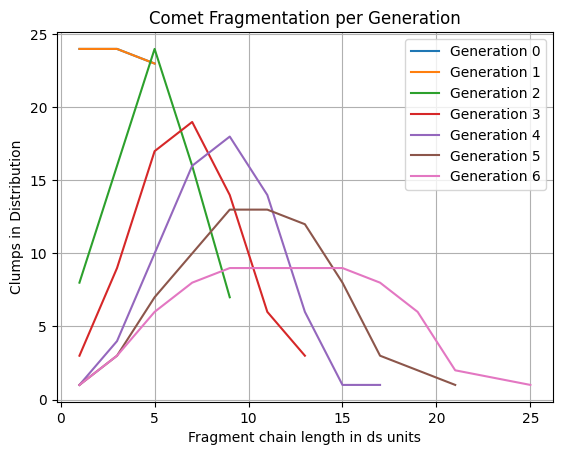

In [ ]:
# @title Visualizing Comet Fragmentation Patterns Over Multiple Generations
patterns_with_none = main()
if patterns_with_none is not None:
    for i, gen_pattern in enumerate(patterns_with_none):
        # Create x values - full range including 'None' places
        x_full_range = list(range(1, len(gen_pattern) + 1))

        # Create y values - length of fragment chain (gen_pattern remains as is, with None)
        y_full_range = gen_pattern

        # Exclude 'None' values from y for plotting
        y_for_plotting = [y for y in y_full_range if y != 0]

        # Include only corresponding x values for the above y (exclude indices where y is 'None')
        x_for_plotting = [x for x, y in zip(x_full_range, y_full_range) if y != 0]

        # Plot the generation
        plt.plot(x_for_plotting, y_for_plotting, label=f'Generation {i}')

    # Set graph titles and labels
    plt.title('Comet Fragmentation per Generation')
    plt.xlabel('Fragment chain length in ds units')
    plt.ylabel('Clumps in Distribution')
    plt.grid(True)
    plt.legend()
    # Show the plot
    plt.show()
else:
    print("No patterns to display.")